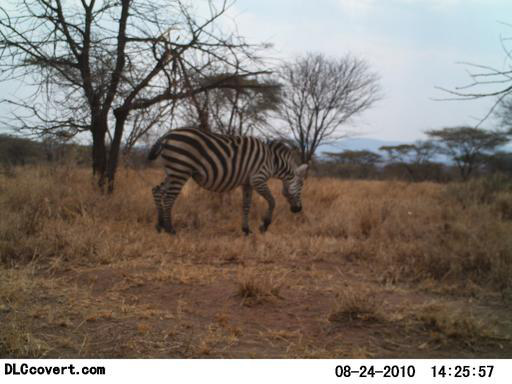

In [1]:
#Viewing an example of image from training/validation
from PIL import Image
im=Image.open('S1/B06/B06_R3/S1_B06_R3_PICT0018.JPG','r')
im

# EDA, creating dataframe of training/validation seasons

In [2]:
#turning relevent information from json file into pandas dataframe
import pandas as pd
import numpy as np
import json

def json_to_dataframe(json_file):
    """Converting json file into pandas dataframe from annotations section of the json file"""
    with open(json_file) as json_data:
        data=json.load(json_data)
    annot=data['annotations']
    annotations=pd.DataFrame(annot)
    annotations['image_id']=annotations['image_id']+'.JPG' #matching image id column to file names
    annotations.fillna(0,inplace=True)
    
    return annotations

In [3]:
annotations= json_to_dataframe('SnapshotSerengetiS01.json')
annotations

,sequence_level_annotation,id,category_id,seq_id,season,datetime,subject_id,count,standing,resting,moving,interacting,young_present,image_id,location
0,True,1ab1a30c-955a-11e9-ad1e-000d3a198845,1,SER_S1#B04#1#1,S1,2010-07-18 16:26:14,ASG0002kjh,1,0.62,0.06,0.0,0.50,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0001.JPG,B04
1,True,1ab1a30d-955a-11e9-a37d-000d3a198845,1,SER_S1#B04#1#2,S1,2010-07-18 16:26:30,ASG0002kji,2,0.10,0.62,0.0,0.33,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0002.JPG,B04
2,True,1ab1a30e-955a-11e9-aeae-000d3a198845,0,SER_S1#B04#1#3,S1,2010-07-20 06:14:06,ASG0002kjj,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG,B04
3,True,1ab1a30f-955a-11e9-980a-000d3a198845,0,SER_S1#B04#1#4,S1,2010-07-22 08:56:06,ASG0002kjk,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG,B04
4,True,1ab1a310-955a-11e9-99ae-000d3a198845,0,SER_S1#B04#1#5,S1,2010-07-24 01:16:28,ASG0002kjl,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG,B04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412853,True,1e2e4972-955a-11e9-a26d-000d3a198845,0,SER_S1#V13#1#1416,S1,2010-09-25 05:17:04,ASG0003eby,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4243.JPG,V13
412854,True,1e2e4973-955a-11e9-8440-000d3a198845,0,SER_S1#V13#1#1416,S1,2010-09-25 05:17:04,ASG0003eby,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4244.JPG,V13
412855,True,1e2e4974-955a-11e9-af3a-000d3a198845,0,SER_S1#V13#1#1416,S1,2010-09-25 05:17:04,ASG0003eby,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4245.JPG,V13
412856,True,1e2e4975-955a-11e9-9b38-000d3a198845,0,SER_S1#V13#1#1417,S1,2010-09-25 05:22:18,ASG0003ebz,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4246.JPG,V13


In [4]:
#checking work looking at row for sample image
annotations.loc[annotations['image_id']=='S1/B06/B06_R3/S1_B06_R3_PICT0018.JPG']

,sequence_level_annotation,id,category_id,seq_id,season,datetime,subject_id,count,standing,resting,moving,interacting,young_present,image_id,location
871,True,1ab46297-955a-11e9-9f2d-000d3a198845,5,SER_S1#B06#3#13,S1,2010-08-24 14:25:56,ASG0002kqq,1,0.07,0.0,0.8,0.0,0.0,S1/B06/B06_R3/S1_B06_R3_PICT0018.JPG,B06


In [5]:
#looking at all possible labels
with open('SnapshotSerengetiS01.json') as json_data:
    data=json.load(json_data)
cats=data['categories']
categories=pd.DataFrame(cats)
categories

,id,name
0,0,empty
1,1,human
2,2,gazellegrants
3,3,reedbuck
4,4,dikdik
...,...,...
56,56,hyenabrown
57,57,wilddog
58,58,kudu
59,59,pangolin


In [6]:
#looking at how the labels are distributed, may want to consider making this a graph for visualization purposes
annotations['category_id'].value_counts()

0     338837
7      29705
5       5592
2       4967
1       4802
17      3217
8       2752
9       2685
23      2322
16      2139
13      1923
11      1687
21      1519
15      1455
3        946
4        728
10       691
18       689
39       665
22       591
24       575
37       428
48       357
32       348
29       340
31       327
34       315
27       304
14       290
20       211
36       198
38       174
12       143
41       129
6        114
40       113
30       112
28        88
33        64
46        57
42        48
25        42
19        38
26        36
44        28
43        27
35        25
45         9
47         6
Name: category_id, dtype: int64

In [7]:
#only 49 of the potential 61 labels are represented in the first season of images
annotations['category_id'].nunique()

49

## Adding more seasons to training/validation set

In [8]:
annotations_2= json_to_dataframe('SnapshotSerengetiS02.json')

In [9]:
annotations_3= json_to_dataframe('SnapshotSerengetiS03.json')

In [10]:
annot_full=pd.concat([annotations,annotations_2,annotations_3],ignore_index=True)
annot_full.drop(columns=['sequence_level_annotation','id','seq_id','subject_id']
                ,inplace=True)


In [11]:
annot_full

,category_id,season,datetime,count,standing,resting,moving,interacting,young_present,image_id,location
0,1,S1,2010-07-18 16:26:14,1,0.62,0.06,0.0,0.50,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0001.JPG,B04
1,1,S1,2010-07-18 16:26:30,2,0.10,0.62,0.0,0.33,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0002.JPG,B04
2,0,S1,2010-07-20 06:14:06,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG,B04
3,0,S1,2010-07-22 08:56:06,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG,B04
4,0,S1,2010-07-24 01:16:28,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG,B04
...,...,...,...,...,...,...,...,...,...,...,...
1394770,0,S3,2012-01-07 12:32:45,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1653.JPG,U10
1394771,0,S3,2012-01-07 12:32:45,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1654.JPG,U10
1394772,0,S3,2012-01-07 12:34:05,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1655.JPG,U10
1394773,0,S3,2012-01-07 12:34:05,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1656.JPG,U10


In [12]:
annot_full['category_id'].nunique()
#still get only 49 of the 61 options

49

In [13]:
#making sure there aren't rows for images that are missing
import os, random, math, glob
path=''
is_f=[]
for p in annot_full.image_id.values:
    if os.path.isfile(path+p):
        is_f.append(1)
    else:
        is_f.append(0)
annot_full['is_f']=is_f
annot_full=annot_full.loc[annot_full.is_f==1]
annot_full.shape

(1379650, 12)

In [14]:
#checking value counts for labels, empty category is significantly larger than all others
annot_full['category_id'].value_counts()

0     990091
18    107601
5      80979
7      71869
16     14427
2      12901
15     12562
17     12186
9       9043
13      9004
11      8149
8       6982
23      5772
21      5629
10      4853
40      3497
37      3081
3       2662
4       2183
24      1919
39      1873
32      1644
29      1629
22      1362
20      1032
31       812
27       727
34       667
33       562
38       507
36       468
14       432
12       361
48       357
6        287
30       252
28       233
19       167
41       145
26       121
46       119
35       111
42       102
25        73
44        67
47        61
43        58
45        31
Name: category_id, dtype: int64

In [15]:
#annot_full has extra information I don't necessarily need for the image classification I want to start with but
#may be useful for future work
annot_full.reset_index(inplace=True)
annot_full.drop(columns=['is_f','index'],inplace=True)
annot_full

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,category_id,season,datetime,count,standing,resting,moving,interacting,young_present,image_id,location
0,0,S1,2010-07-20 06:14:06,0,0.00,0.0,0.00,0.0,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG,B04
1,0,S1,2010-07-22 08:56:06,0,0.00,0.0,0.00,0.0,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG,B04
2,0,S1,2010-07-24 01:16:28,0,0.00,0.0,0.00,0.0,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG,B04
3,2,S1,2010-07-24 08:20:10,1,0.00,0.0,1.00,0.0,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0006.JPG,B04
4,3,S1,2010-07-24 10:14:32,1,0.83,0.0,0.17,0.0,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0007.JPG,B04
...,...,...,...,...,...,...,...,...,...,...,...
1379645,0,S3,2012-01-07 12:32:45,0,0.00,0.0,0.00,0.0,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1653.JPG,U10
1379646,0,S3,2012-01-07 12:32:45,0,0.00,0.0,0.00,0.0,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1654.JPG,U10
1379647,0,S3,2012-01-07 12:34:05,0,0.00,0.0,0.00,0.0,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1655.JPG,U10
1379648,0,S3,2012-01-07 12:34:05,0,0.00,0.0,0.00,0.0,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1656.JPG,U10


In [16]:
#simplified dataframe
labels= annot_full[['category_id','season','datetime','count','image_id','location']].copy()
labels

,category_id,season,datetime,count,image_id,location
0,0,S1,2010-07-20 06:14:06,0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG,B04
1,0,S1,2010-07-22 08:56:06,0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG,B04
2,0,S1,2010-07-24 01:16:28,0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG,B04
3,2,S1,2010-07-24 08:20:10,1,S1/B04/B04_R1/S1_B04_R1_PICT0006.JPG,B04
4,3,S1,2010-07-24 10:14:32,1,S1/B04/B04_R1/S1_B04_R1_PICT0007.JPG,B04
...,...,...,...,...,...,...
1379645,0,S3,2012-01-07 12:32:45,0,S3/U10/U10_R12/S3_U10_R12_IMAG1653.JPG,U10
1379646,0,S3,2012-01-07 12:32:45,0,S3/U10/U10_R12/S3_U10_R12_IMAG1654.JPG,U10
1379647,0,S3,2012-01-07 12:34:05,0,S3/U10/U10_R12/S3_U10_R12_IMAG1655.JPG,U10
1379648,0,S3,2012-01-07 12:34:05,0,S3/U10/U10_R12/S3_U10_R12_IMAG1656.JPG,U10


In [17]:
#adding in label names to go with catefory_id numerical value
categories.rename(columns={'id':'category_id','name':'species'},inplace=True)
species_labels=categories.merge(labels,on='category_id')
species_labels

,category_id,species,season,datetime,count,image_id,location
0,0,empty,S1,2010-07-20 06:14:06,0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG,B04
1,0,empty,S1,2010-07-22 08:56:06,0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG,B04
2,0,empty,S1,2010-07-24 01:16:28,0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG,B04
3,0,empty,S1,2010-07-30 05:24:50,0,S1/B04/B04_R1/S1_B04_R1_PICT0010.JPG,B04
4,0,empty,S1,2010-07-30 20:54:16,0,S1/B04/B04_R1/S1_B04_R1_PICT0011.JPG,B04
...,...,...,...,...,...,...,...
1379645,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0084.JPG,U13
1379646,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0085.JPG,U13
1379647,48,reptiles,S1,2010-10-01 13:40:06,2,S1/U13/U13_R1/S1_U13_R1_PICT0359.JPG,U13
1379648,48,reptiles,S1,2010-10-01 13:40:06,2,S1/U13/U13_R1/S1_U13_R1_PICT0360.JPG,U13


In [18]:
#drop 90% of empty to help with imbalance issues
to_drop_train=species_labels[(species_labels['species']=='empty')].sample(frac=.9,random_state=42).index
species_labels.drop(to_drop_train,inplace=True)
species_labels.shape

(488568, 7)

In [19]:
species_labels.reset_index(inplace=True)
species_labels

,index,category_id,species,season,datetime,count,image_id,location
0,5,0,empty,S1,2010-08-02 11:43:14,0,S1/B04/B04_R1/S1_B04_R1_PICT0014.JPG,B04
1,13,0,empty,S1,2010-07-20 15:23:10,0,S1/B05/B05_R1/S1_B05_R1_PICT0004.JPG,B05
2,15,0,empty,S1,2010-07-21 14:34:02,0,S1/B05/B05_R1/S1_B05_R1_PICT0008.JPG,B05
3,27,0,empty,S1,2010-08-03 01:06:08,0,S1/B05/B05_R1/S1_B05_R1_PICT0050.JPG,B05
4,37,0,empty,S1,2010-08-10 17:58:00,0,S1/B05/B05_R1/S1_B05_R1_PICT0074.JPG,B05
...,...,...,...,...,...,...,...,...
488563,1379645,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0084.JPG,U13
488564,1379646,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0085.JPG,U13
488565,1379647,48,reptiles,S1,2010-10-01 13:40:06,2,S1/U13/U13_R1/S1_U13_R1_PICT0359.JPG,U13
488566,1379648,48,reptiles,S1,2010-10-01 13:40:06,2,S1/U13/U13_R1/S1_U13_R1_PICT0360.JPG,U13


In [20]:
species_labels.drop(columns=['index','location'],inplace=True)
species_labels

,category_id,species,season,datetime,count,image_id
0,0,empty,S1,2010-08-02 11:43:14,0,S1/B04/B04_R1/S1_B04_R1_PICT0014.JPG
1,0,empty,S1,2010-07-20 15:23:10,0,S1/B05/B05_R1/S1_B05_R1_PICT0004.JPG
2,0,empty,S1,2010-07-21 14:34:02,0,S1/B05/B05_R1/S1_B05_R1_PICT0008.JPG
3,0,empty,S1,2010-08-03 01:06:08,0,S1/B05/B05_R1/S1_B05_R1_PICT0050.JPG
4,0,empty,S1,2010-08-10 17:58:00,0,S1/B05/B05_R1/S1_B05_R1_PICT0074.JPG
...,...,...,...,...,...,...
488563,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0084.JPG
488564,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0085.JPG
488565,48,reptiles,S1,2010-10-01 13:40:06,2,S1/U13/U13_R1/S1_U13_R1_PICT0359.JPG
488566,48,reptiles,S1,2010-10-01 13:40:06,2,S1/U13/U13_R1/S1_U13_R1_PICT0360.JPG


In [21]:
#checking labeling and image path
def look_at_those_animals(species_type,random_state):
    image_ids=species_labels[species_labels['species']==species_type]['image_id']
    print(image_ids.shape)
    image=image_ids.sample(random_state=random_state).values[0]
    print(image)
    IM=Image.open('{}'.format(image),'r')
    return IM

(9004,)
S3/R09/R09_R12/S3_R09_R12_IMAG1669.JPG


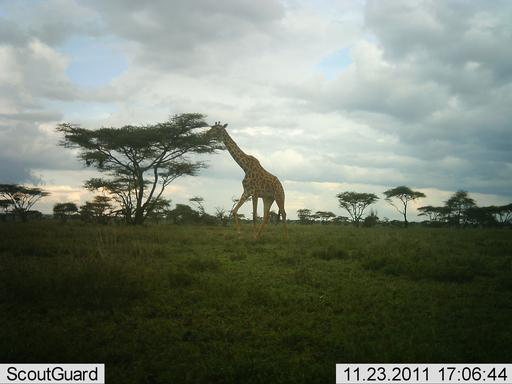

In [22]:
look_at_those_animals('giraffe',10)

(357,)
S1/O10/O10_R1/S1_O10_R1_PICT2028.JPG


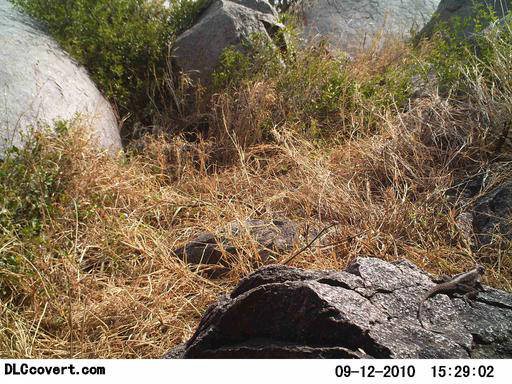

In [23]:
look_at_those_animals('reptiles',10)

In [24]:
species_labels.to_csv('species_labels.csv')